**Author: Alfredo Gimenez Zapiola**
## Functional Data Analysis meets Streaming Machine Learning

In this project, I intend to do both a **knowledge sharing** of a [paper](https://onlinelibrary.wiley.com/doi/full/10.1002/qre.2949) co-authored by Prof. Vantini of Nonparametric Statistics, as well as an **integration** with the contents studied at the Streaming Data Analytics (SDA) (Prof. Della Valle) course.
<br><br>
<ins> Citation of the paper:</ins> Capezza, C, Centofanti, F, Lepore, A, Menafoglio, A, Palumbo, B, Vantini, S. Functional regression control chart for monitoring ship CO2 emissions. Qual Reliab Eng Int. 2021; 1– 19. https://doi.org/10.1002/qre.2949
#### What the paper is about
<ins> Functional regression control chart for monitoring ship CO2 emissions </ins> 
<br>
The paper presents a **supervised learning problem**. The target variable are the total CO2 emissions of ship trips, whereas the covariates are functions, such as the acceleration along the whole time of the voyage, the velocity, etc.
<br>
There are two main **takeaways** for the Streaming Machine Learning setting:
 * We can **extract numerical features** from the functions performing a **principal component analysis** on the functions. The scores (scalar) of each trip on the principal components are the features used to perform learning.
 <br>
 * Thanks to mathematical properties of the L2 Hilbert space (a space of functions) and of linear regression, not only the prediction error can be monitored, but also the scores. In other words, **anomaly detection** is performed both on the **target variable** and on the **predicting variables** with **control charts**.
 
#### The contributions of this project
1. A **demo** of how state-of-the-art functional analysis techniques can be used not only in the Machine Learning but in the Streaming Machine Learning setting for **feature extraction**.
2. A new **methodology** which incorproates the SDA topics, such that Functional Data Analysis techniques can also be used for **Concept Drift** detection as well as in the **Streaming Machine Learning setting**.


## Index

### I.  Theoretical Framework & Methodology
 The basics of the quoted paper are explained. 

### II.  Canada Weather Dataset.
  A very well-known and simple functional dataset is used to show a basic demonstration.
 <br>
  In this case, it is a classification problem, with the **temperature** and **humidity** across time functions are the covariate, and the **type of station** is the label to be predicted. 

### III. Ships dataset
  The dataset originally used on the paper is utilised, applying **Concept Drift Detectors** and showing how it can be used on streaming machine learnign with **Hoeffding Tree Regressors**.

### I.  Theoretical Framework & Methodology

####  I. Covariates.
##### What it means to have functions as covariates
 The regressors are functions assumed to belong to $L^2(\Omega) $, where $\Omega$ the domain of the function, in these applications a finite (and hence compact) subset of $\mathbb{R}$.
 <br> Belonging to $L^2(\Omega) $ means that $\int_{\Omega} {|f(t)|}^2 dt < + \infty$
 <br>
 <br>
 A special property of $L^2(\Omega) $, in contrast with $L^p(\Omega) $ for any other $p$, is that is is a **Hilbert space**, hence it has a dot product.
 
##### The samples in the supervised learning setting.
 In addition, we may have, for every sample of data, not only one function (say that of acceleration), but many (also the velocity, the wind, temperature, etc.)
 <br>
 Hence we can represent the dataset in the following way: 
 $(y_i, \mathbf{X_i})_{i \in N}$
 where: <br>
  * $N$ is the cardinality of the dataset
  * $\mathbf{X_i} = (X_{i1}, X_{i2},  X_{ip})_{p \in P}$ where P is the number of dimensions, and each X_p is a function defined on $\Omega$ that measures something related to the sample (acceleration, temperature, etc). $\mathbf{X_i}$ is thus a random element with each dimension taking values in  $L^2(\Omega) $.
  * $y_i$ is what we want to predict; can be a label (Canada Weather dataset) or a real number (Ships dataset)
 
#### II. Feature extraction
##### 1.  <ins> Smoothing </ins>
<br>
 The covariates, insofar they are functions, are infinite-dimensional. However, we do not have infinite-dimensional measurements but discretised ones. 
<br>
  Therefore, to get the functions, different a basis (Fourier, B-Spline) is chosen to perform the smoothing, using the measurements to find the optimal coefficients, such that the functions are expressed as a linear combination of the basis.  (see the canada weather dataset for a visual demonstration)
<br>

##### 2.  <ins> Spectral decomposition </ins>
<br>
As mentioned before, the main feature of $L^2(\Omega) $ is that is bestowed with a dot product. This means a **spectral decomposition**, the **Functional PCA** can be performed.
<br>
The detailed description and mathematical formulation can be found in the paper. The key takeaway is that the the **covariance operator is approximated with a discretized version** , and the **spectral decomposition** is obtained using it in the same way as in classical machine learning.
<br>
It is important to know that the number of principal components obtained is $n - 1$, where n is the number of samples used for the calculation.
<br>
Just like in the usual setting, the functions have to be standardized before performing the PCA, so the mean and variance of the functions is estimated as well.
    
<br>

##### 3. <ins> Scores </ins>
<br>
Once the spectral decomposition has been done, the scores on the PCs can be obtained.
<br>
The score on the $m$th dimension on the $i$th sample is given by: <br>
$\xi_{mi} = \langle {\mathbf{X_i}, \mathbf{\Psi_m}} \rangle _\mathbb{H} = \sum_{p=1}^{P}\langle {X_{ip},\Psi_{mp}} \rangle _\mathbb{H} \forall i \in N, \forall m \in {1, ..., M}$
<br> 
where 
<br>
$p$ is the index of each dimension
<br>
$M$ is the number of principal components we extract from the spectral decomposition
<br>
$\langle {.,.} \rangle _\mathbb{H}$ is the dot product in the Hilbert Space $\mathbb{H}$

In the paper, the selection of the number of the components is not only based on the scree plot, but also on the PRESS statistic. 

####  III. Phase I and Phase II 
The paper explaines two phases in the methodology:

##### Phase 1. Model estimation

* An under-control sample is used to estimate the PCA, and fits a regression on the target variable using the scores as covariates.

* The distributions of the T² statistic and of the SPE statistic are used to obtain the control limits to use in the control charts.
The T² statistic of the $i$th sample is: <br>
$T^2_i :=  \sum_{m \in M} \frac{(\hat{\xi_{mi}})^2} {\hat{\lambda_m}}$
<br> <br>
with ${\hat{\lambda_m}}$ the $m$th eigenvalue. 
<br> <br>
and the SPE on the $i$th unit is:
<br> <br>
$SPE_i :=  \sum_{m \in M} (\hat{\xi_{mi}})^2 $


##### Phase 2. Monitoring of multivariate functional covariates and scalar response

* The regression is used to predict on new samples, and the scores of the new samples are used to obtain the T² and SPE statistics. 
* The control charts are updated online with the statistics and using the previously estimated control limits.

### II.  Canada Weather Dataset.
* Target variable: the type of station (0, 1, 2, 3)
* Covariates: temperature, humidity, log(humidity) along time for a year
* 35 samples

In [140]:
# scikit-fda
import skfda

Just like in the paper, we select a "training set", which is a set we believe to be under statistical control, to perform the FPCA. From the FPCA we can obtain the scores on new data.
<br>
We perform a random train test split for the sake of this exercise.
<br>
The plots are the following:
* Temperature along time (each colour is a label)
* Smoothed temperature along time

 /home/alfredo/PycharmProjects/SDA-Functional-Control-Charts/venv/lib/python3.6/site-packages/skfda/datasets/_real_datasets.py:817: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


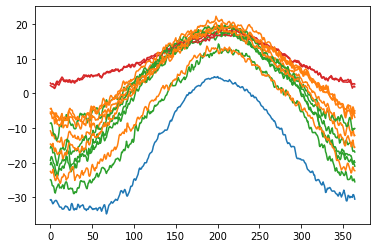

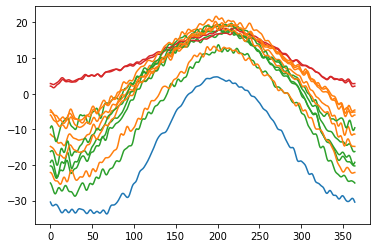

In [141]:

import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedShuffleSplit)

X, y = skfda.datasets.fetch_weather(return_X_y=True) # retrieve the dataset
X = X.data_matrix[:, :, 0]
# cast to an FD object
X = skfda.FDataGrid(data_matrix=X, grid_points=range(365))
# perform train test split
X_train, X_test, y_train, y_test, indtrain, indtest =(
    train_test_split(X, y, range(X.shape[0]), test_size=0.60,
                                                    stratify=y, random_state=0))
# a Fourier basis used for the smoothing
basis = skfda.representation.basis.Fourier(n_basis=109)
X_basis = X_train.to_basis(basis)
X_basis_t = X_test.to_basis(basis)

X_train.plot(group=y_train)
X_basis.plot(group=y_train)
plt.show()

We print the test set indices.

In [142]:
indtest

[30, 16, 29, 32, 28, 24, 12, 3, 7, 10, 21, 27, 22, 15, 11, 2, 31, 14, 5, 33, 0]

The FPCA is done in the **fda** library in R. To use python as in the Streaming Machine Learning courses (and in real-world applications, like lambda functions in Amazon Web Services), we use the library **rpy2** which allows to do an R instance in Python.
<br>
Moreover, a custom function, namely **predictFPCA** is written to obtain the scores of new functions (note this option is not available in the fda library so I had to code it myself).

In [143]:
import rpy2.robjects as robjects
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
robjects.r('''
    library(fda) # load the library
    
    indices_train <- c(9, 23, 26, 20, 4, 17, 25, 19, 1, 18, 8, 6, 34, 13)
    data_W <- CanadianWeather$dailyAv 
    time <- 1:365
    basis.3 <- create.fourier.basis(rangeval=c(0,365),nbasis=109)
    
    # cast the data to fd object
    data_W.fd.3 <- Data2fd(y = data_W,argvals = time,basisobj = basis.3)
    
    # carry out the functional pca
    pca_W.1 <- pca.fd(data_W.fd.3[indices_train],nharm=25,centerfns=T)
    
    # PREPARE TRAINING SET
    
    i <- indices_train[1]
    Z <- cbind(pca_W.1$scores[i, 1:4, 1], pca_W.1$scores[i, 1:4, 2], pca_W.1$scores[i, 1:4, 3])
    Z <- apply(Z, MARGIN = 1, FUN = sum) 
    for (i in 2:length(indices_train)){
          aux <- cbind(pca_W.1$scores[i, 1:4, 1], pca_W.1$scores[i, 1:4, 2], 
                  pca_W.1$scores[i, 1:3, 3])
          Z <- rbind(Z, apply(aux, MARGIN = 1, FUN = sum))
    }
    Z <- as.data.frame(Z)
    rownames(Z) = indices_train
    
    ### PREDICT SCORES ON NEW FUNCTIONAL SAMPLE
    predictFPCA <- function(pca_obj, fdobj, nharm=25, nvar=3){
      # Center (crucial!)
      fdobj$coefs <- fdobj$coefs - pca_obj$meanfd$coefs[,1,]

      harmscr  <- array(0, c(nharm, nvar))
      coefarray <- fdobj$coefs
      harmcoefarray <- (pca_obj$harmonics)$coefs
      basisobj <- fdobj$basis
      for (j in 1:nvar) {
        fdobjj  <- fd(as.matrix(coefarray[,j]), basisobj)
        harmfdj <- fd(as.matrix(harmcoefarray[,,j]), basisobj)
        harmscr[,j] <- inprod(fdobjj, harmfdj)
      }
      return (harmscr)
    }

    # PREPARE TEST SET 
    # define the custom function
    test_ind <- (1:dim(data_W)[2])[-indices_train]
    print(test_ind)
    Z_test <- array(0, c(length(test_ind), 6))
    for (i in 1:length(test_ind)){
      cur.curve <- data_W.fd.3[ test_ind[i] ]
      scores <- predictFPCA(pca_W.1, cur.curve, nharm=25, nvar=3)
      Z_test[i, ] = apply(scores[1:6,], MARGIN = 1, FUN = sum)
    }

    Z_test <- as.data.frame(Z_test)
    rownames(Z_test) <- test_ind
    
    
''')
# convert the R objects to python objects
with localconverter(robjects.default_converter + pandas2ri.converter):
    X_train = robjects.conversion.rpy2py(robjects.r('Z'))
    X_test = robjects.conversion.rpy2py(robjects.r('Z_test'))
X_train


 [1]  2  3  5  7 10 11 12 14 15 16 21 22 24 27 28 29 30 31 32 33 35


,V1,V2,V3,V4
9,72.706262,69.563374,-10.763957,-3.479456
23,-8.660909,-15.050356,21.431621,-13.049428
26,177.206028,37.156911,26.041769,2.941476
20,-15.167206,-40.915000,9.380945,-4.343573
4,106.976402,41.714564,-8.337847,-3.132779
17,-26.538445,-47.124274,-7.189573,-2.037762
25,118.445192,-34.217252,35.984706,-0.798111
19,-193.155653,40.376843,-4.248008,-24.151646
1,72.706262,69.563374,-10.763957,-3.948534
18,-73.807478,-30.232159,-1.205404,-7.792184


Above we see the dataframe of the training dataset. The first four components were kept. 

Now, the Streaming Machine Learning pipeline is set up. Having in total 35 samples, a rolling window of 5 samples is used for the accuracy.
<br>
The chosen model is the multinomial regression, with a standard scaler for the features

In [144]:
from river.metrics import Rolling, Accuracy
# from river.tree import HoeffdingTreeClassifier
from river.stream import iter_pandas
from river import linear_model
from river import preprocessing


metric = Rolling(Accuracy(), window_size=5)
# model = HoeffdingTreeClassifier()
model = preprocessing.StandardScaler()  # important to standardize
model |= linear_model.SoftmaxRegression()


In [145]:
import pandas as pd
# training set:
for x, y in iter_pandas(X=X_train, y=pd.Series(y_train)):
    y_p = model.predict_one(x)   # Predict class
    if y_p is not None:
        print(metric.update(y_true=y, y_pred=y_p))
    model.learn_one(x, y)        # Train the model


Accuracy: 0.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 33.33%	(rolling 5)
Accuracy: 50.00%	(rolling 5)
Accuracy: 60.00%	(rolling 5)
Accuracy: 80.00%	(rolling 5)
Accuracy: 100.00%	(rolling 5)
Accuracy: 100.00%	(rolling 5)
Accuracy: 100.00%	(rolling 5)
Accuracy: 100.00%	(rolling 5)
Accuracy: 100.00%	(rolling 5)
Accuracy: 80.00%	(rolling 5)
Accuracy: 80.00%	(rolling 5)


We observe the model learns quite well. 
<br>
We move on to the "online" set. Here it is called test set, but it will be equivalent to the samples that arrive real time.
<br>
The following is carried out:
* Page Hinkley Concept Drift detectors for the first 2 covariates: the scores on the first and second principal component
* a DDM for the classification error

In [146]:
# test set:
# control charts too
from river.drift import PageHinkley
from river.drift import DDM

# monitor regressors
page_h_1 = PageHinkley(min_instances=10)
page_h_2 = PageHinkley(min_instances=10)

# monitor classification error
ddm = DDM()

warnings = list()
drifts = list()
warning = -1


index = 0
for x, y in iter_pandas(X=X_test, y=pd.Series(y_test)):
    
    y_p = model.predict_one(x)   # Predict class
    
    page_h_1.update(x['V1'])  # update the monitor of the first regressor
    page_h_2.update(x['V2'])  
    
    if y_p is not None:
        print(metric.update(y_true=y, y_pred=y_p))  
        ddm.update(y!=y_p)  # for DDM, 1 means error

    warning_detected = (page_h_1.warning_detected or page_h_1.warning_detected or
                        ddm.warning_detected)
    if warning_detected:
        warning = i
        print("Warning detected at index %s" % index)
    change_detected = (page_h_1.change_detected or page_h_1.change_detected or
                        ddm.change_detected)
    if change_detected:
        if warning != -1:
            print(f"""Warning detected at index 
                  {warning} and Change detected at index {index}""")
            warnings.append(warning)
            warning = -1
        else: 
            print(f'Change detected at index {index}')
        drifts.append(index)
        page_h_1.reset()
        page_h_2.reset()
        ddm.reset()
        
        
    model.learn_one(x, y)        # Train the model
    
    index += 1
    

Accuracy: 60.00%	(rolling 5)
Accuracy: 40.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 40.00%	(rolling 5)
Accuracy: 60.00%	(rolling 5)
Change detected at index 8
Accuracy: 60.00%	(rolling 5)
Accuracy: 60.00%	(rolling 5)
Accuracy: 40.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 0.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Change detected at index 17
Accuracy: 20.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)
Accuracy: 20.00%	(rolling 5)


As time goes by, the model becomes less and less efficient. This makes sense, since the FPCA was performed on the initial samples, and even if the model adapts to new scores, these scores do not corresponds to the true principal components of the data so far.
<br>
Thus we can suggest that the functional covariance matrix should be updated on a streaming fashion. This is possible since there is an online version for the standard deviation, and concept drift detectors can be used to notify changes in stationarity.
<br>
We move on to the data used on the paper.

## Ships dataset

In this dataset we have:
* y: the CO2 emissions of the ship voyage (real number)
The functions associated to each voyage, to mention a few are:
* Velocity
* Acceleration
* Power difference between port and starboard propeller shafts
* Distance from the nominal route
* Longitudinal wind component
* Transverse wind component
* Air temperature, mean of four engines
* Trim
* Cumulative sailing time

For full detail, the paper can be consulted.

#### Feature extraction
Again with rpy2 the FPCA is performed.
<br><br>
In this case, 50 principal components are used.
<br> <br>
As "training" or "under control" dataset, the first 60 samples are used. This differs from the exact methodology in the paper.
<br><br>
Moreover, in the paper the principal components are chosen not taking into account their explained variance, but the marginal reduction of sum of squares when regressing CO2.
<br><br>
To maintain simplicity, in this demonstration, the first 50 are kept. This in a way makes sense, since the chosen model for online learning is a **Hoeffding Regressor** instead of a linear regression.
<br><br>
The T² and the SPE statistics are obtained as well for the control charts.
<br><br>
To obtain the control limits, without making any assumptions on their distributions, we use **chebysev's inequality**, which guarantees for **any distribution** that 91% of the data lie within 4 standard deviations from the mean. 

In [147]:
robjects.r('''
library(fda)
    load("shipsfd_2.RData")

    indices_train <- 1:60
    # perform the FPCA on the first 60 samples
    pca_W.1 <- pca.fd(ships.fd[indices_train],nharm=50,centerfns=F)

    # PREPARE TRAINING SET

    keep_pcs <- 15 # keep scores on up to keep_pcs components
    Z <- array(0, c(60,50))
    for (i in 1:60){
      Z[i,] <- apply(pca_W.1$scores[i,,], MARGIN = 1, FUN = sum)
    }
    Z <- as.data.frame(Z)  # done preparing the under control set
    rownames(Z) = indices_train    

    # OBTAIN T2 statistic on the training set
    SPE <- Z^2 # square element-wise
    T2 <- SPE[,1:keep_pcs]
    for ( i in ncol(T2)){
      T2[,i] = SPE[,i] / pca_W.1$values[i]
    }
    T2 <- apply(T2, MARGIN = 1, FUN = sum)
    SPE <- SPE[,-(1:keep_pcs)]
    print(dim(SPE))
    SPE <- apply(SPE, MARGIN = 1, FUN = sum)

    # set up upper control limits. 4 sdev for 93.75% of data (CHEBYSEV)
    UCL.T2 <- mean(T2) + sd(T2) * 4 
    UCL.SPE <- mean(SPE) + sd(SPE) * 4 

    # OBTAIN "ONLINE" SET

    ### PREDICT SCORES ON NEW FUNCTIONAL SAMPLE
    predictFPCA <- function(pca_obj, fdobj, nharm=25, nvar=3){
      # Center (crucial!)
      # fdobj$coefs <- fdobj$coefs - pca_obj$meanfd$coefs[,1,]

      harmscr  <- array(0, c(nharm, nvar))
      coefarray <- fdobj$coefs
      harmcoefarray <- (pca_obj$harmonics)$coefs
      basisobj <- fdobj$basis
      for (j in 1:nvar) {
        fdobjj  <- fd(as.matrix(coefarray[,j]), basisobj)
        harmfdj <- fd(as.matrix(harmcoefarray[,,j]), basisobj)
        harmscr[,j] <- inprod(fdobjj, harmfdj)
      }
      return (harmscr)
    }

    load("y_C02_emissions.RData")
    indices_test <- (1:dim(y)[1])[-indices_train]
    y_na <- c(292, 508, 705)
    y <- y[-y_na, ]
    indices_test <- indices_test[-y_na]
    Z_test <- array(0, dim = c(length(indices_test), 50) )
    ok.ships <- NULL
    k = 0
    for (i in indices_test){
      tryCatch({
        cur.curve <- ships.fd[ i ]
        scores <- predictFPCA(pca_W.1, cur.curve, nharm=50, nvar=9)
        Z_test[k, ] = apply(scores[1:50,], MARGIN = 1, FUN = sum)
        k = k+1
        ok.ships <- c(ok.ships, i)
      },
      error = function(e){
        print(e)
        print(i)
      })

    }  
    Z_test <- as.data.frame(Z_test)
    print(problematic.ships)
    y <- as.data.frame(y)
''')

with localconverter(robjects.default_converter + pandas2ri.converter):
    ships_train = robjects.conversion.rpy2py(robjects.r('Z'))
    ships_test = robjects.conversion.rpy2py(robjects.r('Z_test'))
    UCL_T2 = robjects.conversion.rpy2py(robjects.r('UCL.T2'))
    UCL_SPE = robjects.conversion.rpy2py(robjects.r('UCL.SPE'))
    y_ships = robjects.conversion.rpy2py(robjects.r('y'))
    eigenvals = robjects.conversion.rpy2py(robjects.r('pca_W.1$values'))
    
ships_train.head()

[1] 60 35
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 914
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 915
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 916
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 917
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 918
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 919
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 920
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 921
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 922
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 923
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 924
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 925
<simpleError in coef[, i, j, drop = drop]: subscript out of bounds>
[1] 926
<s

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
1,-5.077012,-0.662082,-0.377007,-0.181477,0.139123,0.057143,0.298137,0.003450,-0.269580,0.072661,...,0.027466,-0.117731,-0.056258,0.119344,-0.017147,0.071547,0.038464,-0.024256,-0.043773,0.012330
2,-4.650823,-0.671112,-0.594233,0.427589,0.461700,0.158687,0.180896,-0.170136,-0.261907,0.034156,...,-0.003824,0.062129,0.070946,0.062528,-0.137525,-0.044717,0.044070,-0.149388,0.045780,0.065253
3,-5.884794,0.792936,-0.820078,-0.416234,0.330343,-0.066530,0.243584,0.097111,-0.506205,0.112085,...,0.015155,-0.053970,-0.078555,0.070175,0.008732,0.037544,-0.071986,-0.034402,0.043776,-0.038008
4,-4.583373,-0.261519,0.626435,0.544395,0.173456,-0.512786,-0.060359,-0.395006,-0.047621,-0.097986,...,-0.080397,-0.079991,0.011334,-0.104518,0.083937,-0.073498,-0.056642,0.022020,-0.020888,-0.105588
5,-4.919551,-0.004096,0.140410,-0.142255,-0.281733,0.404240,-0.331869,0.071278,-0.042934,-0.180384,...,0.164986,0.150434,-0.084224,-0.112581,-0.005493,-0.013948,-0.092107,0.097928,-0.065660,0.136851


In [148]:
ships_test.shape[0] + ships_train.shape[0]

951

In [149]:
y_ships.shape

(951, 2)

In [150]:
ships_test.shape[0] + ships_train.shape[0]

951

In [151]:
ships_test = ships_test.iloc[:851,:]
y_ships = y_ships.iloc[:(951-40),]
assert ships_test.shape[0] + ships_train.shape[0] == y_ships.shape[0]

In [152]:
ships_test.iloc[:850,:].tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
846,0.516514,0.215359,0.133868,-0.233821,-0.093670,0.030812,0.188357,-0.642207,0.376104,0.180155,...,-0.138184,0.004983,-0.001882,0.035990,0.060217,-0.005635,-0.073767,-0.025642,0.043239,0.212172
847,-0.766207,-1.180138,-0.341864,0.099256,-0.074838,1.641660,0.527456,0.955989,-0.048212,-0.026923,...,0.237214,-0.049867,-0.123977,0.229299,0.175267,-0.031148,-0.175155,-0.103403,0.115980,0.173859
848,1.051611,1.177727,-0.035214,-0.345421,-0.029058,-0.020550,0.117148,0.036612,-0.008801,-0.045492,...,-0.035292,-0.015747,0.239189,-0.014169,0.212505,-0.005564,0.084687,0.182636,-0.025965,0.141982
849,1.177192,-0.992549,-0.675790,-0.247458,-0.221972,0.955710,-0.264266,-0.232479,-0.121152,0.129822,...,-0.001015,0.013670,0.034228,0.142222,0.069132,-0.072757,-0.127565,0.054049,-0.223040,-0.147685
850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The sample that failed to be projected with the covariance matrix is taken out.

In [153]:
y_ships = y_ships[~y_ships.isin(['295'])][:]
#y_ships = y_ships.iloc[1:914,:]

In [154]:
y_ships.shape

(911, 2)

For the CUSUM chart, which will be used for the MSE, the class defined at the exercise session is used and modified to keep the long term record for a later plot.

In [155]:
class CUSUM():
    def __init__(self,delta,lamb,min_obs):
        # Initialization
        self._n = 1
        self._x_mean = 0.0
        self._sum = 0.0
        self._delta = delta
        self._lambda = lamb
        self._min_obs = min_obs
        self.warning_detected = False
        self.change_detected = False
        self.mean_list = list()  # keep track of the mean
        self.sum_list = list() # keep track of the cumulative sum
        
    def update(self,value):
        self._x_mean += (value - self._x_mean) / self._n
        self.mean_list.append(self._x_mean) # add to mean list
        self._sum = max(0, self._sum + value - self._x_mean - self._delta)
        self.sum_list.append(self._sum)  # add to sum list
        self._n += 1
        
        if self._n >= self._min_obs and self._sum > self._lambda:
            self.change_detected = True
        
        
    def reset(self):
        self._n = 1
        self._x_mean = 0.0
        self._sum = 0.0
        self.warning_detected = False
        self.change_detected = False

We first learn on the "under control" dataset.

In [189]:
from river.tree import HoeffdingTreeRegressor
from river import metrics

# grace_period: Number of instances a leaf should observe between split attempts.
model = preprocessing.StandardScaler() |  HoeffdingTreeRegressor(grace_period = 30) 
#model = preprocessing.StandardScaler() | linear_model.LinearRegression(intercept_lr=.1)

metric = Rolling(metrics.MSE(), window_size=30)

for x, y in iter_pandas(X=ships_train, y=y_ships.iloc[:60, 1]):
    x = {k: x[k] for k in list(x.keys())[:15]}
    y_p = model.predict_one(x)   # Predict class
    if y_p is not None:
        print(metric.update(y_true=y, y_pred=y_p).get())
    model.learn_one(x, y)        # Train the model

2276.8482006903196
2277.452668251654
2268.187856286409
2398.3235596474183
2186.4508597100994
2022.62947423468
2045.8635250896941
2118.740048102014
1998.9198297789865
1976.422051055602
1960.1803553091856
1901.5648855637996
1857.2246168646982
1812.4113085899498
1813.6380700318878
1779.7278048925693
1784.0521667565274
1797.6082982311864
1733.1259023320708
1719.8953859855583
1638.6459681083725
1596.876923802162
1595.393470553615
1542.0346418519293
1620.4984063987072
1558.485649138599
1534.7889015220055
1505.3517689954588
1462.536228061851
1464.5686397843326
1409.5481430128123
1341.3565280068028
1314.3567991315726
1239.7674501037172
1221.0554416525451
1180.9792920489858
1115.6206207869309
1028.6412069347214
1000.9645563161258
943.5161962757093
900.2335226459834
866.526362688026
846.5019184417913
825.1996904767198
804.7913451386792
762.4226326889165
725.7872742900169
662.3495125776134
659.5478899638605
610.8474929348074
624.4060555589135
612.3485249733612
564.4564539401858
580.3906425518484


The results make sense, since in the paper a 100 MSE was achieved on the whole dataset.

We proceed to **online learning**.
<br> <br>
Page Hinkley CD detectors are used for the first two principal components (chosen just for the demo, the most significant ones could be chosen as well).

In [190]:
from IPython.display import display, clear_output

from river.drift import PageHinkley
from river.drift import DDM

# monitor regressors
page_h_eigenval_1 = PageHinkley(min_instances=10)
page_h_eigenval_2 = PageHinkley(min_instances=10)

# monitor classification error
cusum = CUSUM(delta=0.005,lamb=10,min_obs=30)

warnings = list()
drifts = list()
T2 = list()
SPE = list()
warning = -1


index = 0
for x, y in iter_pandas(X=ships_test, y=y_ships.iloc[60:, 1]):
    #print({k: x[k] for k in list(x.keys())[15:]})
    xspe = {k: x[k] for k in list(x.keys())[15:]}
    x = {k: x[k] for k in list(x.keys())[:15]}    
    clear_output(wait=True)
    
    y_p = model.predict_one(x)   # Predict class
    
    page_h_1.update(x['V1'])  # update the monitor of the first regressor
    page_h_2.update(x['V2'])  
    cur_T2 = 0
    cur_SPE = 0
    k = 0
    for p in (x.keys()):
        cur_T2 += x[p]**2 / eigenvals[k]
        k += 1
    for p in xspe.keys():
        cur_SPE += (xspe[p])**2
    T2.append(cur_T2)
    SPE.append(cur_SPE)
    
    
    if y_p is not None:
        display(metric.update(y_true=y, y_pred=y_p).get())  
        ddm.update(y!=y_p)  # for DDM, 1 means error
        cusum.update(metric.update(y_true=y, y_pred=y_p).get())

    warning_detected = (page_h_1.warning_detected or page_h_1.warning_detected or
                        ddm.warning_detected)
    if warning_detected:
        warning = i
        display("Warning detected at index %s" % index)
    change_detected = (page_h_1.change_detected or page_h_1.change_detected or
                        ddm.change_detected)
    if change_detected:
        if warning != -1:
            display(f"""Warning detected at index 
                  {warning} and Change detected at index {index}""")
            warnings.append(warning)
            warning = -1
        else: 
            print(f'Change detected at index {index}')
        drifts.append(index)
        
    model.learn_one(x, y)        # Train the model
    
    index += 1
    

13.735731333014165

In [181]:
warnings

[]

In [182]:
drifts

[236, 558]

In [183]:
ships_test.shape

(851, 50)

In [184]:
y_ships.iloc[60:, 1].shape

(851,)

## Control charts

In [185]:
 from matplotlib import pyplot as plt

### CUSUM (MSE monitoring)
We observe it diverges, so every 30 data there is a change detected.
<br>
The divergence is likely to happen for the same reason as for the CanadaWeather example: the covariance matrix estimate is not updated, and thus the projections are more and more uncertain. 

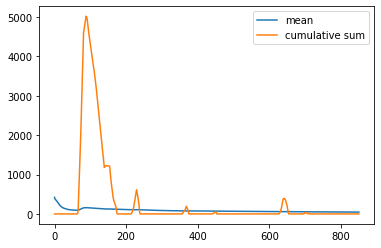

In [192]:
plt.plot(cusum.mean_list[0:], label= "mean")
plt.plot(cusum.sum_list[0:], label= "cumulative sum")
plt.legend()
plt.show()

### T² Control chart

Here we recall the upper control limit was obtained via **chebysev inequality** and the training (or under control) data set.
<br>
The high UCL value for T2 shows the high variance in the estimate of the covariance matrix.

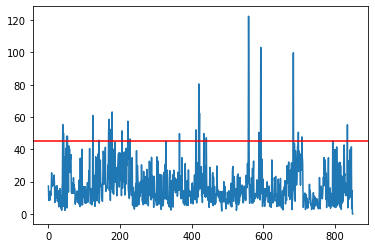

In [193]:
plt.plot(T2, label='T2')
plt.axhline(y=UCL_T2, color='r', linestyle='-')
plt.show()

## SPE control chart

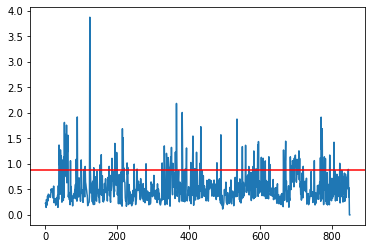

In [194]:
plt.plot(SPE, label='T2')
plt.axhline(y=UCL_SPE, color='r', linestyle='-')
plt.show()

## Conclusion and proposals.
### Conclusion
With this project, we have seen how functional data analysis could be incorporated not only in the anomaly detection (control charts) setting as it was done in the original paper.
<br>
It can also be extended to the **Streaming machine learning** setting, where a model that is not necessarily a **Linear regression** can be used: in this case, a **Hoeffding tree** was used both for classification and regression, using the features of FPCA. 

### Proposals
In both examples it is shown that the new samples, which were not used in the FPCA have more and more uncertain values in their scores. This is confirmed by the fact that even within the "training" set the control limits were extremely high.
<br>
This is due to the fact a covariance matrix for 18 dimensions of functional data, with 100 bases for smoothing and 50 principal components are being estimated with 60 samples.
<br>
The main proposal would thus be an **online version** of the **FPCA**, which can of course be obtained 
<br> Further dimensionality reduction techniques such as **functional depth measures** could be incorporated as well in the feature extraction.
<br><br>
### The most important realization of this project 
In addition, with the use of **concept drift tools**, if the FPCA covariance matrix is being updated, when there is a **warning**, **samples could be kept apart** to obtain **a new FPCA covariance matrix**. This keeping-apart of samples, thanks to the properties of the FPCA could be supported theoretically (just like the Hoeffding bound) thanks to its properties, and in my opinion should be further investigated.

